In [23]:
#Pymaceuticals Analysis
 ##The tumor sizes ranged from 40-50 mm3 in each of the drug regimens that were observed 
 ##Generally, the heavier the mouse, the larger the tumor, although it only had a 70% correlation with the data. It is a positive correlation but still on the lower end of the correlation sprectrum.
 ##The two drugs that seemed more effective, according to the boxplot, are Capomulin and Ramicane. They both had signficantly lower final tumor values with no outliers.
    

In [2]:
%matplotlib notebook

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_merge= pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_data_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mouse_count = len(mouse_data_merge["Mouse ID"].unique())
mouse_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_dup_data=mouse_data_merge.loc[mouse_data_merge.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_dup_data


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_dup_data_g989 = mouse_data_merge.loc[mouse_data_merge["Mouse ID"]== "g989",:]
mouse_dup_data_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_dup_data_drop_clean = mouse_data_merge[mouse_data_merge["Mouse ID"].isin(mouse_dup_data) == False]
mouse_dup_data_drop_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(mouse_dup_data_drop_clean["Mouse ID"].unique())
mouse_count_clean

248

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = mouse_dup_data_drop_clean.groupby("Drug Regimen")

regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
regimen_std = regimen_group["Tumor Volume (mm3)"].std()
regimen_sem = regimen_group["Tumor Volume (mm3)"].sem()

regimen_stats_table = pd.DataFrame ({"Mean":regimen_mean,
                                     "Median":regimen_median,
                                     "Variance":regimen_var,
                                     "Standard Deviation":regimen_std,
                                     "SEM":regimen_sem})
regimen_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<IPython.core.display.Javascript object>


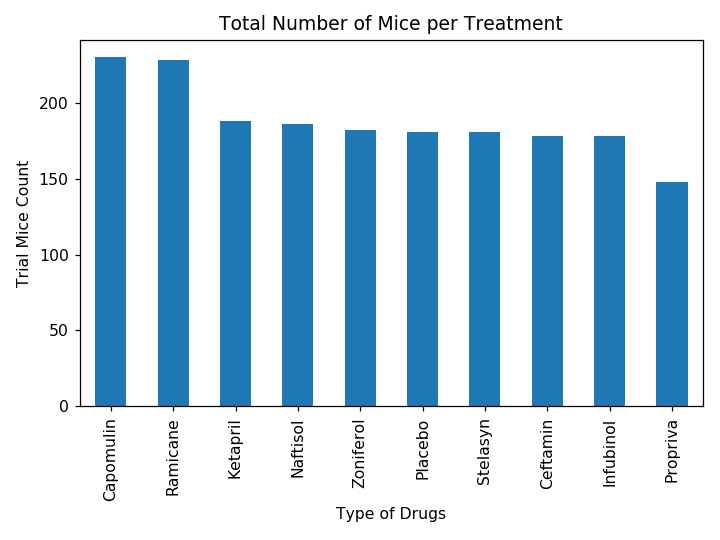

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_treatment = mouse_dup_data_drop_clean["Drug Regimen"].value_counts()

mice_treatment.plot(kind="bar")
plt.title("Total Number of Mice per Treatment")
plt.ylabel("Trial Mice Count")
plt.xlabel("Type of Drugs")
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


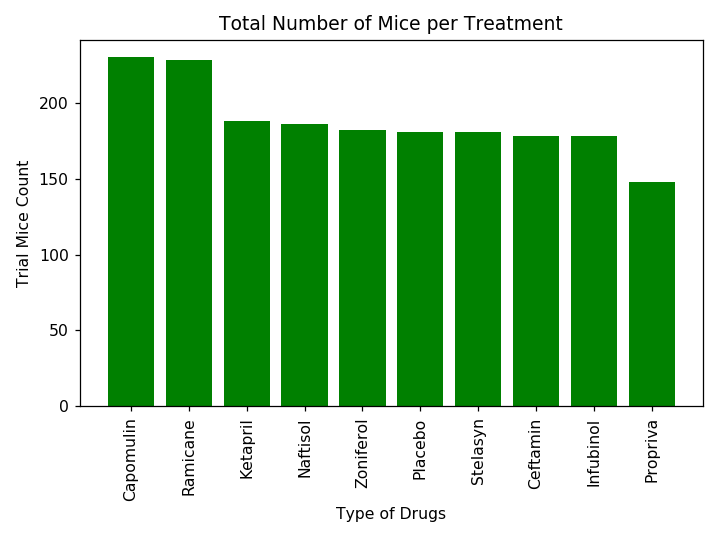

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_treatment_2 = mouse_dup_data_drop_clean["Drug Regimen"].value_counts()

mice_count_trial = mice_treatment_2.values
drug_index= mice_treatment_2.index
ticks = [drug for drug in drug_index]

plt.bar(drug_index, mice_count_trial, color='g')
plt.xticks(ticks, drug_index, rotation="vertical")
plt.title("Total Number of Mice per Treatment")
plt.ylabel("Trial Mice Count")
plt.xlabel("Type of Drugs")
plt.tight_layout()
plt.show()






<IPython.core.display.Javascript object>


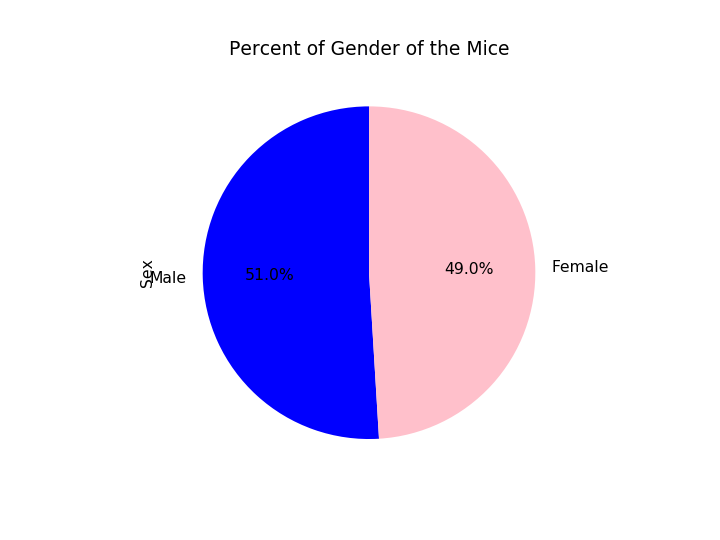

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = mouse_dup_data_drop_clean["Sex"].value_counts()
colors=["blue", "pink"]
mice_gender.plot(kind="pie", colors=colors,autopct="%1.1f%%", startangle=90)
plt.title("Percent of Gender of the Mice")
plt.show()


<IPython.core.display.Javascript object>


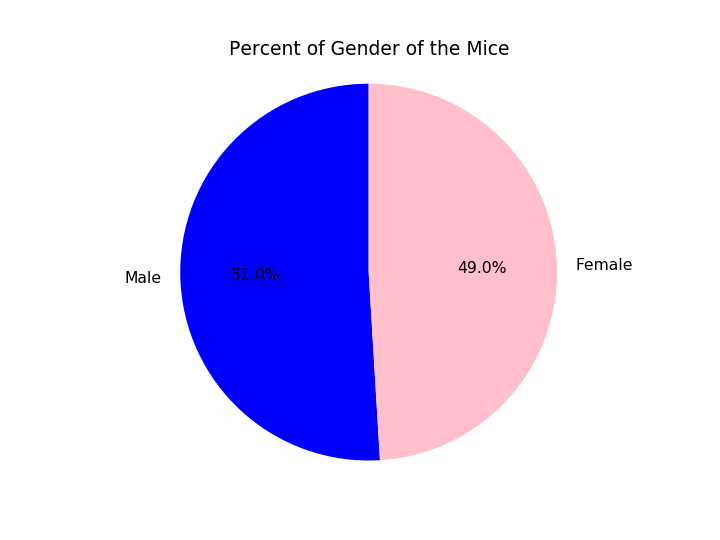

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts= mouse_dup_data_drop_clean["Sex"].value_counts()
colors=["blue", "pink"]
plt.pie(counts, labels=labels, colors=colors,autopct="%1.1f%%", startangle=90)
plt.title("Percent of Gender of the Mice")
plt.axis("equal")
plt.show()

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_dup_data_time = mouse_dup_data_drop_clean.drop_duplicates(subset=['Mouse ID'], keep='last')
mouse_dup_data_time.sort_values(by="Timepoint", ascending=False)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1023,j984,Stelasyn,Female,2,30,45,70.653832,1
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1043,k382,Ketapril,Male,22,29,45,73.715619,4
...,...,...,...,...,...,...,...,...
938,h428,Ketapril,Female,1,27,0,45.000000,0
1315,o848,Stelasyn,Female,14,27,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
752,d133,Zoniferol,Male,5,30,0,45.000000,0


In [17]:
# IQR Capomulin
capomulin =mouse_dup_data_time.loc[mouse_dup_data_time["Drug Regimen"]== "Capomulin"]["Tumor Volume (mm3)"]
cap_quart = capomulin.quantile([.25,.5,.75])
cap_lower = cap_quart[.25]
cap_upper = cap_quart[.75]
iqr_cap= cap_upper-cap_lower
print(f"The lower quartile of the Tumor Volume for Capomulin is: {cap_lower}")
print(f"The upper quartile of the Tumor Volume for Capomulin is: {cap_upper}")
print(f"The interquartile range of Tumor Volume for Capomulin is: {iqr_cap}")

lower_bound_cap = cap_lower - (1.5*iqr_cap)
upper_bound_cap = cap_upper + (1.5*iqr_cap)
print(f"Values below {lower_bound_cap} could be outliers for Capomulin.")
print(f"Values above {upper_bound_cap} could be outliers for Capomulin.")


#IQR Ramicane
ramicane =mouse_dup_data_time.loc[mouse_dup_data_time["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
ram_quart = ramicane.quantile([.25,.5,.75])
ram_lower = ram_quart[.25]
ram_upper = ram_quart[.75]
iqr_ram= ram_upper-ram_lower
print(f"The lower quartile of the Tumor Volume for Ramicane is: {ram_lower}")
print(f"The upper quartile of the Tumor Volume for Ramicane is: {ram_upper}")
print(f"The interquartile range of Tumor Volume for Ramicane is: {iqr_ram}")

lower_bound_ram = ram_lower - (1.5*iqr_ram)
upper_bound_ram = ram_upper + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} could be outliers for Ramicane.")
print(f"Values above {upper_bound_ram} could be outliers for Ramicane.")

#IQR Infubinol

infubinol =mouse_dup_data_time.loc[mouse_dup_data_time["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]
inf_quart = infubinol.quantile([.25,.5,.75])
inf_lower = inf_quart[.25]
inf_upper = inf_quart[.75]
iqr_inf= inf_upper-inf_lower
print(f"The lower quartile of the Tumor Volume for Infubinol is: {inf_lower}")
print(f"The upper quartile of the Tumor Volume for Infubinol is: {inf_upper}")
print(f"The interquartile range of Tumor Volume for Infubinol is: {iqr_inf}")

lower_bound_inf = inf_lower - (1.5*iqr_inf)
upper_bound_inf = inf_upper + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} could be outliers for Infubinol.")
print(f"Values above {upper_bound_inf} could be outliers for Infubinol.")

#IQR Ceftamin
ceftamin =mouse_dup_data_time.loc[mouse_dup_data_time["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]
cef_quart = ceftamin.quantile([.25,.5,.75])
cef_lower = cef_quart[.25]
cef_upper = cef_quart[.75]
iqr_cef= cef_upper-cef_lower
print(f"The lower quartile of the Tumor Volume for Ceftamin is: {cef_lower}")
print(f"The upper quartile of the Tumor Volume for Ceftamin is: {cef_upper}")
print(f"The interquartile range of Tumor Volume for Ceftamin is: {iqr_cef}")

lower_bound_cef = cef_lower - (1.5*iqr_cef)
upper_bound_cef = cef_upper + (1.5*iqr_cef)
print(f"Values below {lower_bound_cef} could be outliers for Ceftamin.")
print(f"Values above {upper_bound_cef} could be outliers for Ceftamin.")


The lower quartile of the Tumor Volume for Capomulin is: 32.37735684
The upper quartile of the Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Tumor Volume for Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
The lower quartile of the Tumor Volume for Ramicane is: 31.56046955
The upper quartile of the Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Tumor Volume for Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
The lower quartile of the Tumor Volume for Infubinol is: 54.04860769
The upper quartile of the Tumor Volume for Infubinol is: 65.52574285
The interquartile range of Tumor Volume for Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for I

<IPython.core.display.Javascript object>


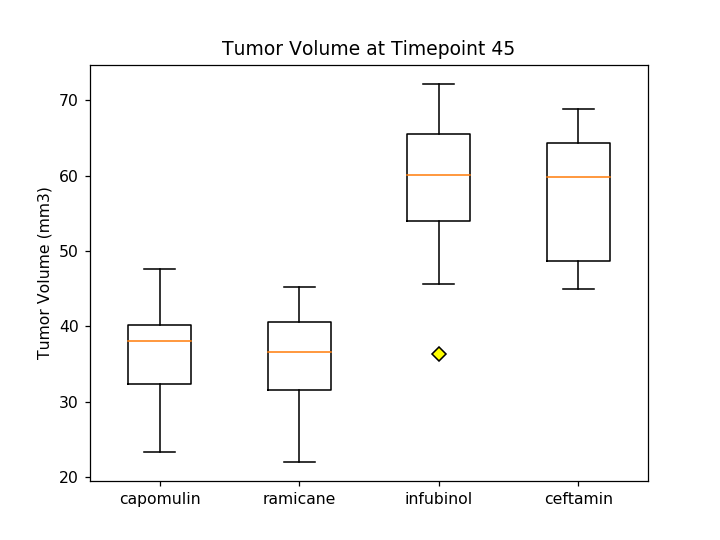

In [18]:
#Make Box Plot
yellow_diamond = dict(markerfacecolor='yellow', marker='D')
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["capomulin","ramicane","infubinol","ceftamin"], flierprops=yellow_diamond)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume at Timepoint 45")
plt.show()


<IPython.core.display.Javascript object>


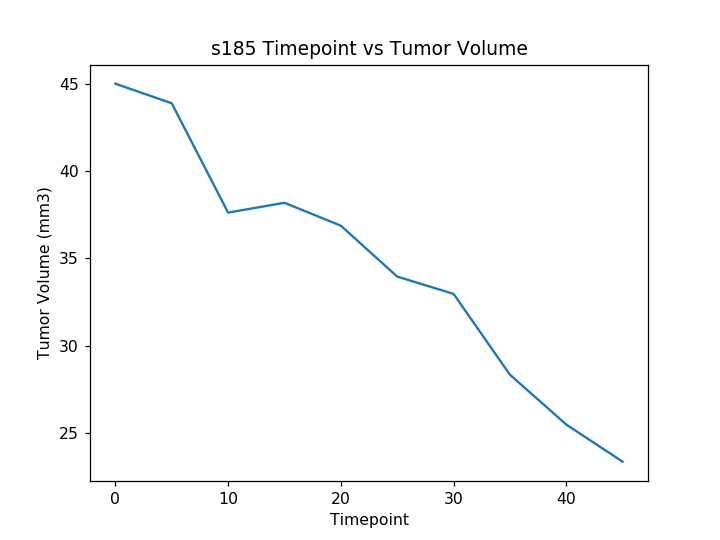

Text(0, 0.5, 'Tumor Volume (mm3)')

In [19]:
#Select a mouse that was treated with Capomulin and generate a line plot of time point versus tumor volume for that mouse.
#cap_mouse= mouse_dup_data_drop_clean.loc[mouse_dup_data_drop_clean["Drug Regimen"]== "Capomulin"]
#cap_mouse
cap_mouse_pick = mouse_dup_data_drop_clean.loc[mouse_dup_data_drop_clean["Mouse ID"]== "s185"]
cap_mouse_pick

plt.plot(cap_mouse_pick["Timepoint"], cap_mouse_pick["Tumor Volume (mm3)"])
plt.title("s185 Timepoint vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")



<IPython.core.display.Javascript object>


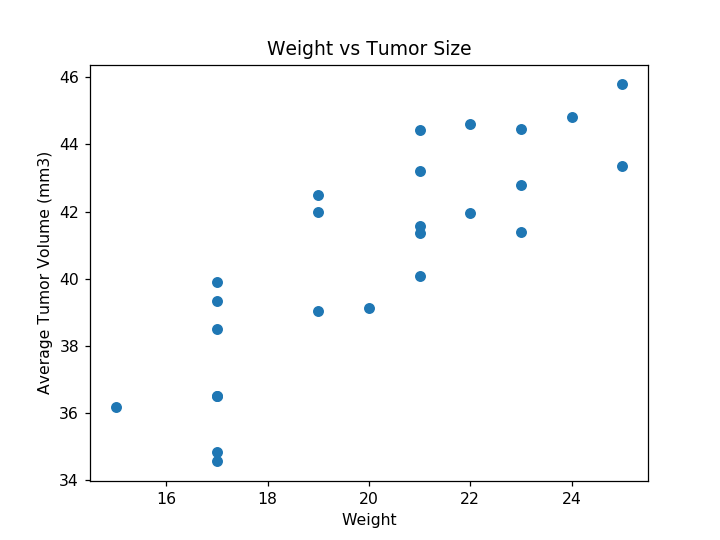

Text(0, 0.5, 'Average Tumor Volume (mm3)')

In [20]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
cap_treatment_weight = mouse_dup_data_drop_clean.loc[mouse_dup_data_drop_clean["Drug Regimen"]== "Capomulin"]
cap_treatment_avg = cap_treatment_weight.groupby(["Mouse ID"]).mean()
plt.scatter(cap_treatment_avg["Weight (g)"], cap_treatment_avg["Tumor Volume (mm3)"])
plt.title("Weight vs Tumor Size")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")


y = 0.95x +21.55


<IPython.core.display.Javascript object>


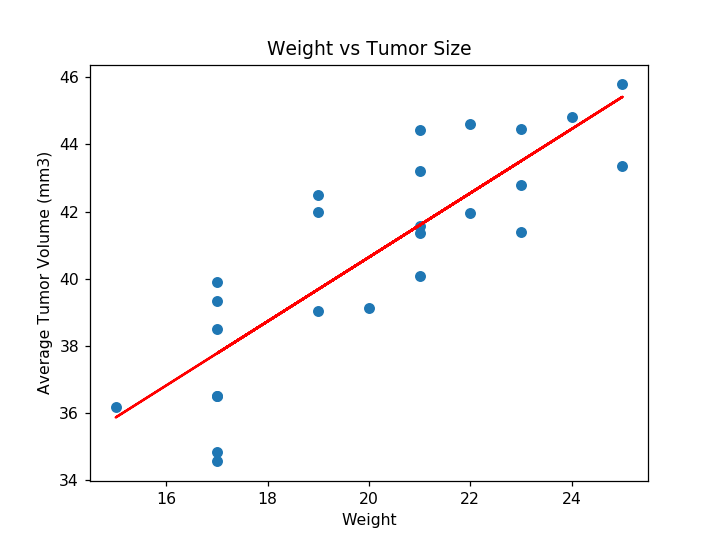

The r-squared is: 0.7088568047708717


In [21]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment
weight_values=cap_treatment_avg["Weight (g)"]
tumor_values=cap_treatment_avg["Tumor Volume (mm3)"]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(weight_values, tumor_values)

# regression values
regression_values = weight_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(weight_values,tumor_values)
plt.plot(weight_values,regression_values,"r-")

# Label plot and annotate the line equation
plt.title("Weight vs Tumor Size")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()